  # 集成学习：Voting（投票法）详解

**Voting（投票法）**是集成学习（Ensemble Learning）中最简单、最直观的方法之一。它通过**结合多个基模型的预测**，以提升整体预测性能和鲁棒性。

---

## 一、核心思想

Voting通过构建**多个不同的基分类器（或回归器）**，再将它们的预测进行合并：

- 分类任务：采用投票机制（多数投票或加权投票）
- 回归任务：采用平均机制（简单平均或加权平均）

Voting并不改变基模型本身，而是提升预测的**稳定性与泛化能力**。

---

## 二、Voting分类器类型

### 1. 硬投票（Hard Voting）

**多数投票（Majority Voting）**：

- 每个分类器输出一个类别标签
- 最终结果是出现次数最多的类别

公式：
$$
\hat{y} = \arg\max_c \sum_{i=1}^{M} \mathbb{I}(h_i(x) = c)
$$

其中：
- $h_i(x)$：第$i$个模型对样本$x$的预测
- $\mathbb{I}$：指示函数（若条件为真则为1）

---

### 2. 软投票（Soft Voting）

**概率平均投票（Averaging Probabilities）**：

- 每个分类器输出预测概率分布
- 将概率加权平均，再选择最大概率类别

公式：
$$
\hat{y} = \arg\max_c \sum_{i=1}^{M} w_i \cdot P_i(y = c \mid x)
$$

其中：
- $w_i$：第$i$个模型权重（默认等权）
- $P_i$：第$i$个模型预测的概率

> **注意**：软投票要求基模型支持 `predict_proba()`。

---

## 三、Voting与Bagging/Boosting的对比

| 特性             | Voting               | Bagging                 | Boosting                   |
|------------------|----------------------|-------------------------|----------------------------|
| 样本重采样       | 否                   | 有（自助采样）          | 有（依赖上一次模型）       |
| 基模型依赖性     | 无（独立）           | 无（独立）              | 有（串行依赖）             |
| 权重调整         | 可选（加权投票）     | 无                      | 有（误差加权）             |
| 适用场景         | 各种基模型的简单集成 | 同质基模型（如树）       | 同质弱学习器（如树桩）     |

---

## 四、优缺点

### ✅ 优点：
- 简单易实现
- 可整合不同类型的模型
- 提高模型稳定性

### ❌ 缺点：
- 不一定显著优于最好的单一模型
- 如果基模型过于相似，提升有限
- 软投票需支持概率预测

---

## 五、Python示例（使用scikit-learn）

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# 加载数据
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 定义基模型
clf1 = LogisticRegression(max_iter=200, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = DecisionTreeClassifier(random_state=42)

# 硬投票
voting_hard = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('dt', clf3)],
    voting='hard'
)

voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

# 软投票
voting_soft = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('dt', clf3)],
    voting='soft'
)

voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))
```

---

## 六、什么时候使用Voting？

- 当你有**多种性能相近的模型**，想要提升泛化能力；
- 当模型彼此**差异较大**（多样性高）；
- 当需要简单集成方法而不想使用复杂的Boosting。

---

## 七、Tips

- 投票法通常效果：
  - 多样性 > 相似性
  - 软投票 > 硬投票
- 在使用软投票时要确保所有模型支持 `predict_proba()`
- 可以设置不同权重 `weights=[...]`，提升强模型的贡献

---

## 八、总结

Voting是最简单的集成学习方法，通过整合多个基模型预测结果来提高性能和稳定性。在实际项目中，可以把它作为集成的第一步，结合Stacking等更高级方法进一步提升效果。

---

# 原理解释

In [16]:
import numpy
import numpy as np
n = 1000
p = np.array([0.51, 0.49])
result = []
for i in range(1000):
    num = numpy.random.choice([0, 1],size=n, p=p.ravel())
    if len(num[num==0])>len(num[num==1]):
        result.append(0)
    else:
        result.append(1)
result = np.array(result)
print(len(result[result==0])/float(len(result)))

0.753


# 硬投票

In [17]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
X, y = make_moons(n_samples=7000, noise=0.1, random_state=42)

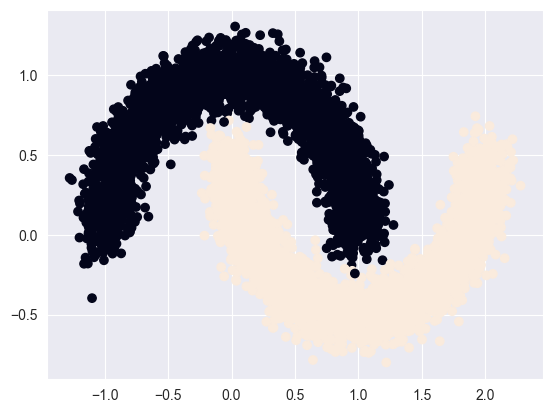

In [19]:
plt.scatter(X[:,0], X[:,1], c=y)

In [20]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# 定义三个分类器

 逻辑回归
 决策树
 SVM

In [21]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

# 投票分类器

In [22]:
voting = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('svm', svm)],voting='hard'
)

In [23]:
for clf in (lr, dt, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8921428571428571
DecisionTreeClassifier 0.9935714285714285
SVC 0.9978571428571429
VotingClassifier 0.9964285714285714
